## Computations notebook

We will calculate all constants and plot all graphs using python, this Jupyter notebook is a place where we will do it.

## Importing modules & reading file

In [47]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('data/case0202.csv')
data.head()

,Unaffect,Affected
0,1.94,1.27
1,1.44,1.63
2,1.56,1.47
3,1.58,1.39
4,2.06,1.93


In [7]:
una = data['Unaffect']
aff = data['Affected']

In [15]:
n = una.shape[0]
print(f"Number of samples: {n}")

Number of samples: 15


## Estimating mean, variance and median. Plotting histograms and ecdf

In [40]:
def estimate(X):
    print(f'{'Mean:' :<30}{X.mean():.3f}')
    print(f'{'Median:' :<30}{X.median():.3f}')
    print(f'{'Variance without correction:' :<30}{((X - X.mean()) ** 2).sum() / n :.3f}')
    print(f'{'Variance with correction:' :<30}{((X - X.mean()) ** 2).sum() / (n - 1):.3f}')

In [41]:
print("Unaffected estimations")
estimate(una)

Unaffected estimations
Mean:                         1.759
Median:                       1.770
Variance without correction:  0.055
Variance with correction:     0.059


In [42]:
print("Affected estimations")
estimate(aff)

Affected estimations
Mean:                         1.560
Median:                       1.590
Variance without correction:  0.085
Variance with correction:     0.091


In [155]:
def plot_hist_ecdf(X):
    fig, [axh, axc] = plt.subplots(1, 2, figsize=(15, 7))
    axh.hist(
        X, density=True, bins=np.arange(0.8, 2.5, 0.2),
        color='grey', edgecolor='black'
    )
    axh.set_title('Histogram')
    
    qs = list(stats.ecdf(X).cdf.quantiles)
    q_mins =  [np.float32('-1000')] + qs # Tried +/-inf, matplotlib refuses to display non-finite values, punk
    q_maxs =  qs + [np.float32('1000')]
    ys = [(i) / n for i in range(len(qs) + 1)]
    axc.hlines(
        ys, q_mins, q_maxs
    )
    axc.scatter(
        qs, ys[1:]
    )
    axc.set_xlim(0.8, 2.4)
    
    axc.set_title('Empirická distribuční funkce')
    return fig, [axh, axc]

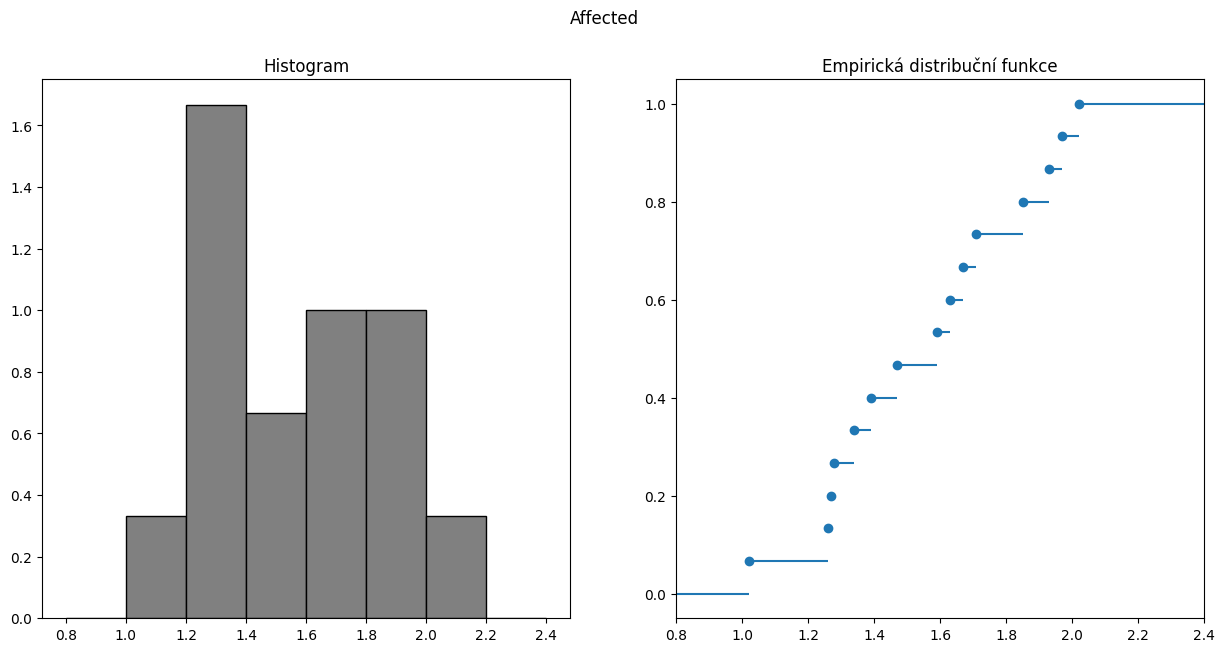

In [156]:
fig, axes = plot_hist_ecdf(aff)
fig.suptitle('Affected')
fig.savefig('img/affected_hist_ecdf.png', format='png')

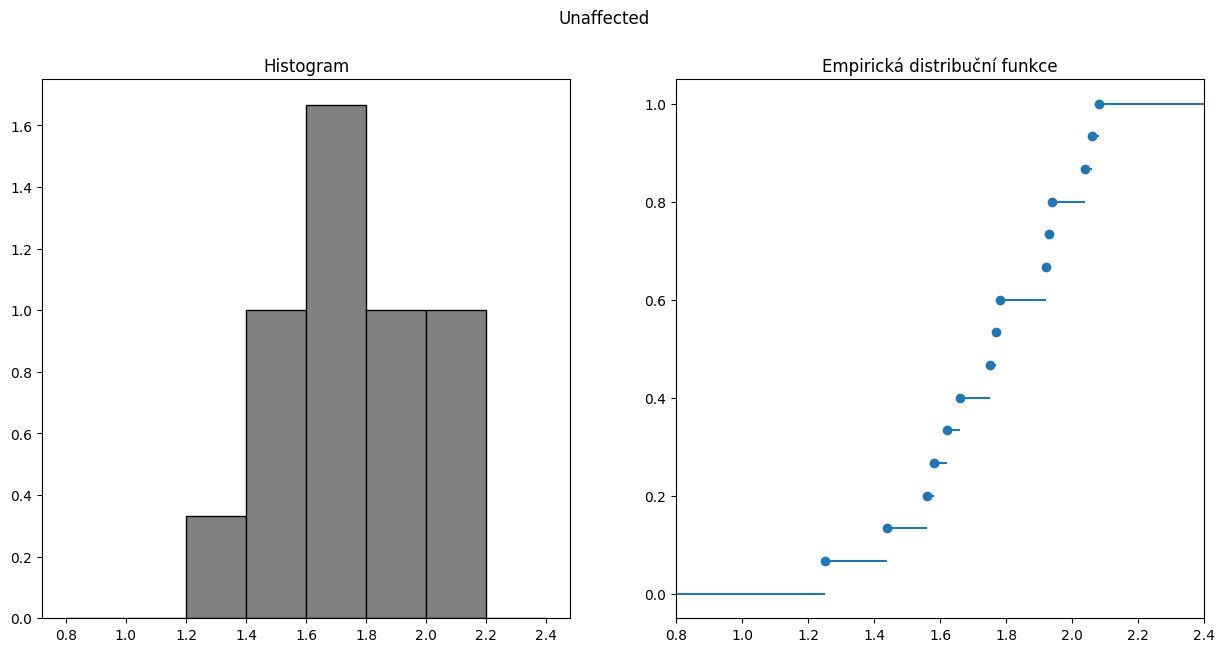

In [157]:
fig, axes = plot_hist_ecdf(una)
fig.suptitle('Unaffected')
fig.savefig('img/unaffected_hist_ecdf.png', format='png')